In [2]:
from Drone_Class import *

In [3]:
## Specify potential choices of origin in llh:
VECT_Drone_Start_LOC=pygeodesy.ellipsoidalNvector.LatLon(40.87031876496191, -72.86561763277804, 23.964228339399998).to3llh()
VECT_BMX_E_LOC=pygeodesy.ellipsoidalNvector.LatLon(40.86995317295864, -72.86603925418495, 19.464228339399998).to3llh()

In [4]:
## ADDITIONAL VECTORIZATION CODING/PROOFS ##
    # CHANGES to drone class following this work:
    # 1. Want to initialize with additional receiver/array variables in dimensioned arrays:
            ##############################################################################################
            # I  Variable      # Dimension # description
            ##############################################################################################
            # A. Keys          # n dishes  # (string with name or channel index?)
            # B. Coordinates   # n by 3vec # (Vector position in local cartesian (E,N,U) relative origin)
            # C. Pointings     # n by 3vec # (Unit Vector in local cartesian (E,N,U))
            # D. Polarizations # n by 3vec # (Unit Vector in local cartesian (E,N,U))
            ##############################################################################################
    # 2. Want to calculate drone coordinates on per-dish basis, for xyz and rpt from origin based arrays
    
## RECEIVER INFORMATION is needed to initialize the geometric environments: ##
## Must include some 'key' strings for labelling/identifying receivers:
Array_Keys=['North','East','South','West']
## Must Specify Coordinates and Pointings of receivers in Local Cartesian in an array of shape: n_receivers x 3 ##
Array_Coords=np.array([[-2.0,2.0,0.1],\
                       [0.0,0.0,0.1],\
                       [-2.0,-2.0,0.1],\
                       [-4.0,0.0,0.1]])
## If pointings are defined by vectors in Local Coordinates (E,N,U) use:
Array_Pointings=np.array([[0,0,1], # +Z (up) in LC \
                          [0,0,1],\
                          [0,0,1],\
                          [0,0,1]])
## If pointings are defined by angles from zenith, use:
Array_Pointings=np.array([RotMat(np.array([0.0,0.0,0.0]))@np.array([0.0,0.0,1.0]),  # e.g. 1 deg of yaw and roll \
                          RotMat(np.array([0.0,0.0,0.0]))@np.array([0.0,0.0,1.0]),\
                          RotMat(np.array([0.0,0.0,0.0]))@np.array([0.0,0.0,1.0]),\
                          RotMat(np.array([0.0,0.0,0.0]))@np.array([0.0,0.0,1.0])])
## Define Array Polarizations (2 per dish) in Local Cartesian E,N,U:
Array_Pols=np.array([[[1,0,0],[0,1,0]], # E,N \
                     [[1,0,0],[0,1,0]], \
                     [[1,0,0],[0,1,0]], \
                     [[1,0,0],[0,1,0]]])

## Specify path to dronefiles:
drone_directory=u'/Users/wct9/python/yale_bmx/Drone_Data/'

In [5]:
## Initialize the class with an example file:
data=Drone_Data(dronedir=drone_directory,\
                FLYTAG='FLY331_processed.csv',\
                Origin_llh=VECT_BMX_E_LOC,\
                dkeys=Array_Keys,\
                dcoords=Array_Coords,\
                dpointings=Array_Pointings,\
                dpols=Array_Pols)

DRONE CLASS initialized -- Loading Drone RTK Data from FLY331_processed.csv:
generating llh, geocentric cartesian, local cartesian, and local spherical coordinates.
generating dish and receiver line of sight coordinates.


plotting drone coordinates for all time samples:
plotting drone coordinates for all time samples:
overplotting drone coordinates for t_cut samples: [17000:115000]


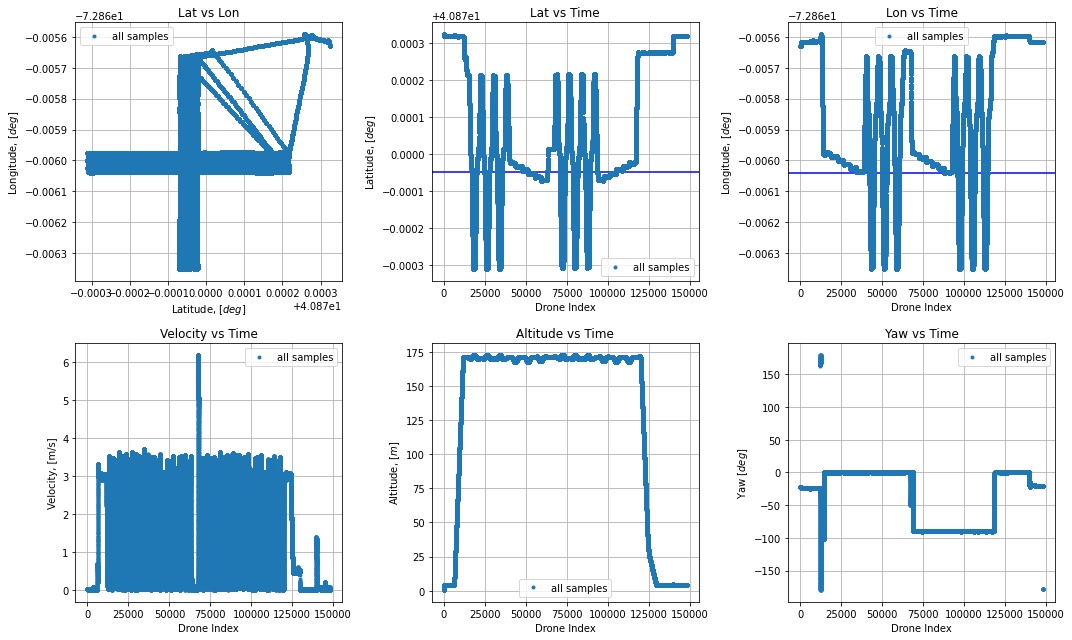

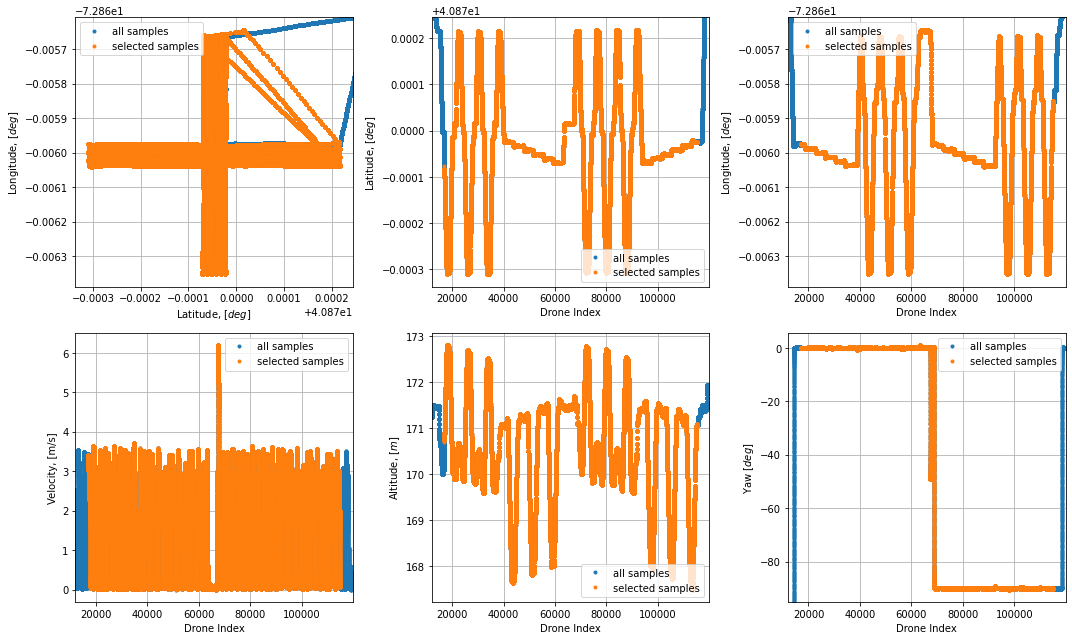

In [6]:
data.Plot_Drone_Coordinates()
data.Plot_Drone_Coordinates(t_cut=True,t_bounds=[17000,115000])

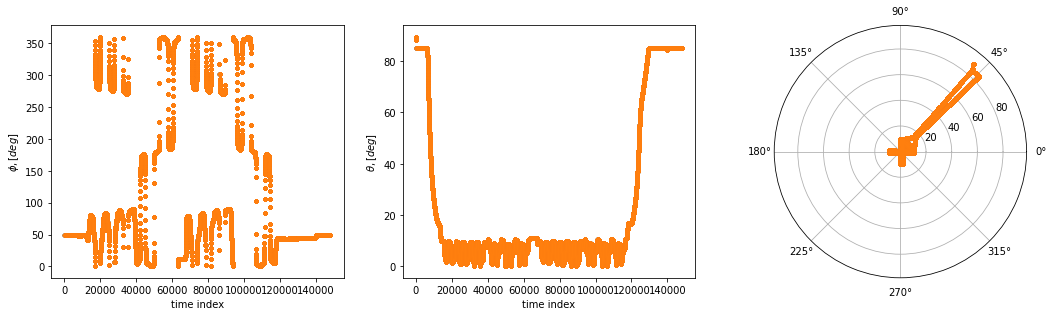

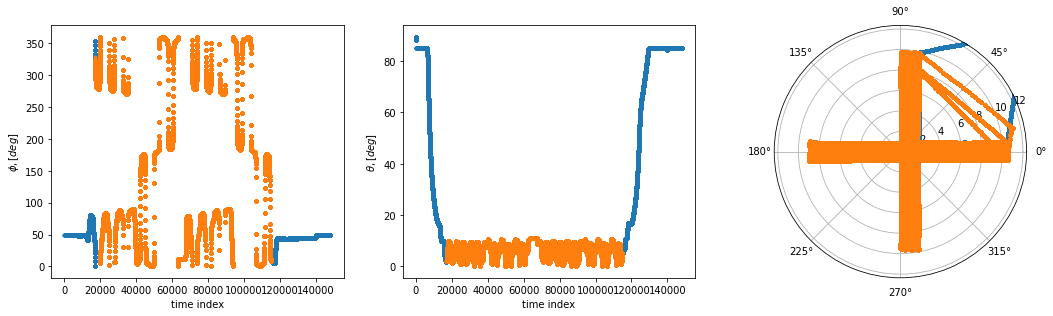

In [7]:
data.Plot_Angular_Coordinates()
data.Plot_Angular_Coordinates(t_bounds=[17000,115000])

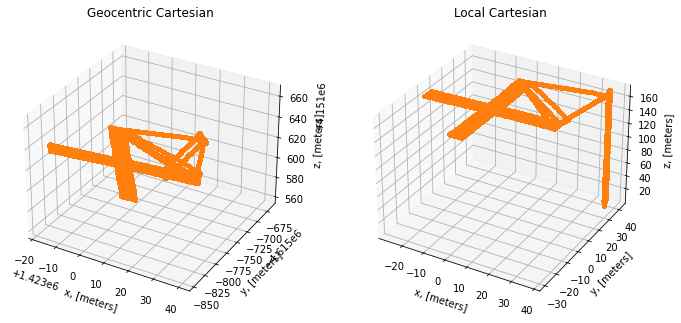

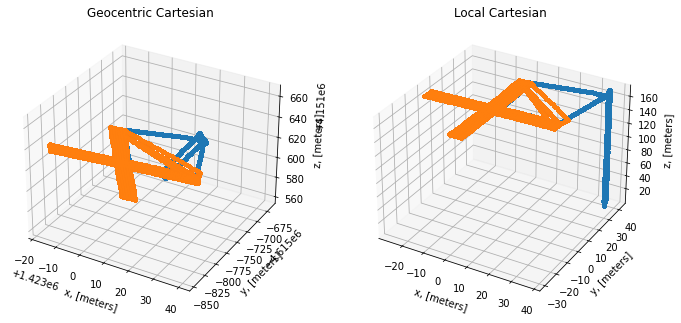

In [8]:
data.Plot_3d()
data.Plot_3d(t_bounds=[17000,115000])

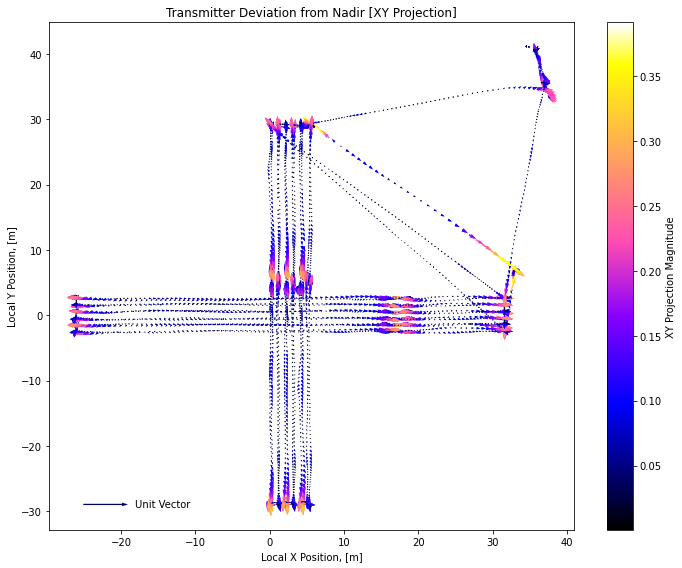

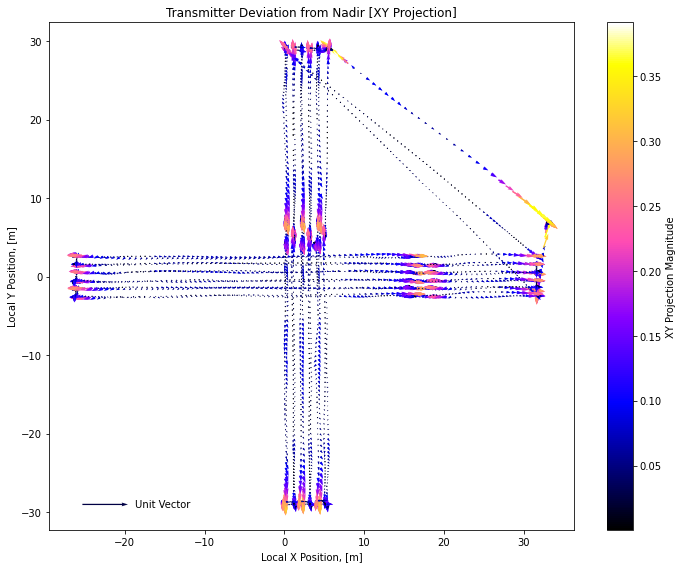

In [9]:
data.Plot_Transmitter_Pointing()
data.Plot_Transmitter_Pointing(t_bounds=[17000,115000],t_step=10)

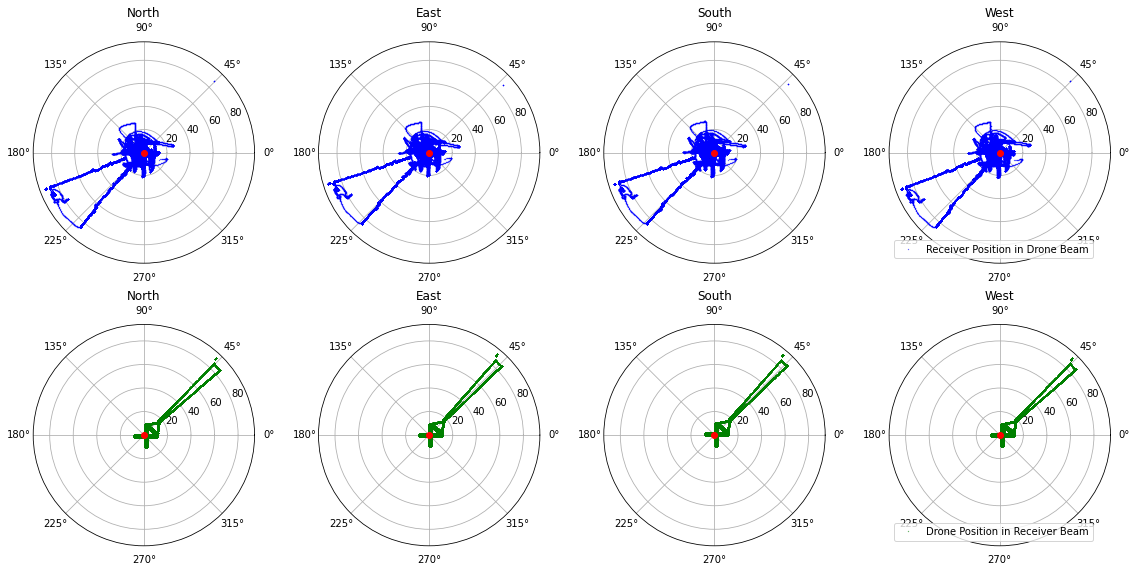

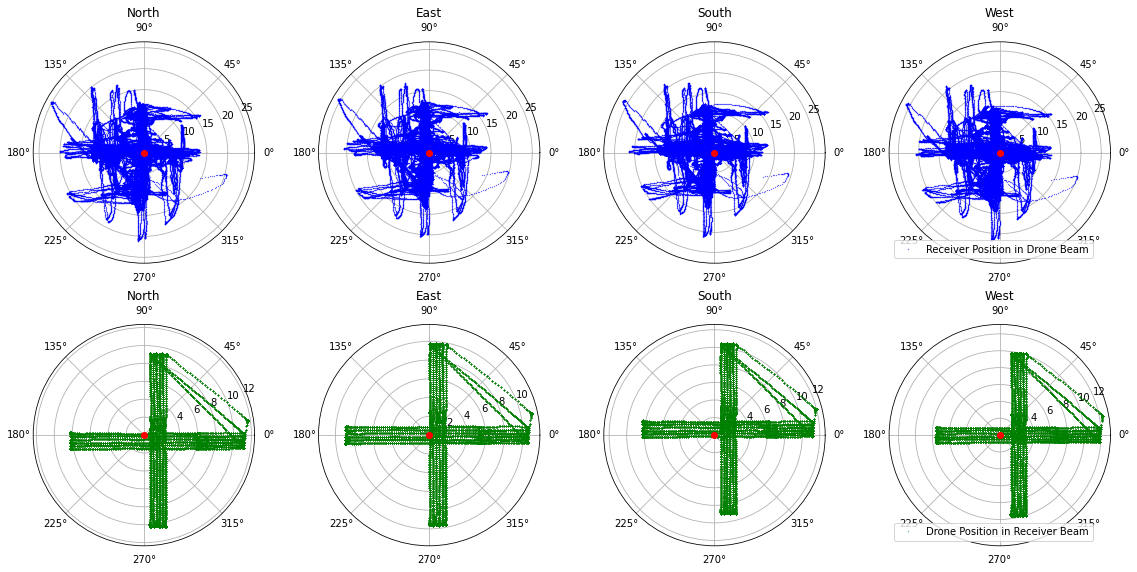

In [10]:
data.Plot_Polar_Lines_of_Sight()
data.Plot_Polar_Lines_of_Sight(t_bounds=[17000,115000],t_step=1)